# Sinkhorn example for 4d gaussians

In [4]:

import numpy as np
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import ot
import ot.plot

In [5]:
import numpy as np

# Set seed
np.random.seed(42)

# Define simple diagonal covariance matrices (no correlation)
mean1 = np.array([0, 0, 0, 0])
cov1 = np.diag([10, 9, 7, 13])

mean2 = np.array([10, -5, 3, 7])
cov2 = np.diag([2, 2, 2, 2])

# Generate samples
n_samples = 1000
X = np.random.multivariate_normal(mean1, cov1, size=n_samples)
Y = np.random.multivariate_normal(mean2, cov2, size=n_samples)

In [6]:
res = ot.solve_sample(X, Y, method='gaussian')

# recover the squared Gaussian
# Bures-Wasserstein distance
BW_dist = res.value
print(BW_dist)

191.37898832858454


In [9]:
# reg term
lambd = 0.7

W = ot.bregman.empirical_sinkhorn2(X, Y, lambd)


In [10]:
print(W.shape)
print(W)

()
193.6551530328423


## Plot as a function of $\lambda$ and $N$

/home/kleon/anaconda3/envs/stochastic/lib/python3.12/site-packages/ot/bregman/_sinkhorn.py:643: UserWarning: Warning: numerical errors at iteration 35
  warnings.warn("Warning: numerical errors at iteration %d" % ii)


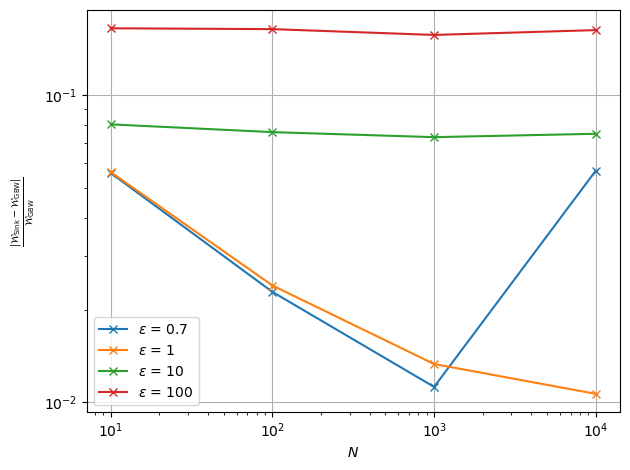

In [12]:
# Define ranges
sample_sizes = [10**i for i in range(1,5)]
epsilons = [0.7, 1, 10, 100]
results = {eps: [] for eps in epsilons}

# Run experiment
for n in sample_sizes:
    X = np.random.multivariate_normal(mean1, cov1, size=n)
    Y = np.random.multivariate_normal(mean2, cov2, size=n)

    # Compute ground truth BW distance
    BW_dist = ot.solve_sample(X, Y, method='gaussian').value

    for eps in epsilons:
        W = ot.bregman.empirical_sinkhorn2(X, Y, reg=eps)
        rel_error = abs(W - BW_dist) / abs(BW_dist)
        results[eps].append(rel_error)

# Plot
for eps in epsilons:
    plt.loglog(sample_sizes, results[eps], marker='x', linestyle='-', label=fr"$\epsilon$ = {eps}")


plt.xlabel(r"$N$")
plt.ylabel(r"$\frac{|\mathcal{W}_{\mathrm{Sink}} - \mathcal{W}_{\mathrm{GBW}}|}{\mathcal{W}_{\mathrm{GBW}}}$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('4d_gaussian_sinkhorn.png', dpi=300, bbox_inches='tight')
plt.show()


# Sinkhorn 1D

In [1]:

import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

In [2]:
n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std
b = gauss(n, m=60, s=10)

# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()

In [3]:
from projected_sinkhorn import sinkhorn
# 1) choose regularization ε and build kernel K = exp(–ε M)
epsilon = 1e-2
K = np.exp(-epsilon * M)

# 2) choose number of Sinkhorn iterations
T = 500

# 3) run Sinkhorn (and track the rounded-coupling costs via compute_otvals)
P, err, otvals = sinkhorn(
    K, a, b, T,
    compute_otvals=True,
    C=M
)

# 4a) “raw” entropic OT cost from the final coupling P
W_entropic = np.sum(P * M)
print(f"Entropic-regularized OT cost  : {W_entropic:.6f}")

# 4b) cost of the final *rounded* coupling
W_rounded  = otvals[-1]
print(f"Rounded-coupling OT cost     : {W_rounded:.6f}")

ModuleNotFoundError: No module named 'projected_sinkhorn'